### **K-Means 1**

**Import**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Dataset**

In [ ]:
X = np.array([
    [2, 4],
    [3, 3],
    [4, 6],
    [5, 8],
    [6, 4],
    [4, 2]
])

**Model**

In [ ]:
# Step 1: Apply KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)

# Cluster labels for each point
print("Cluster labels:", kmeans.labels_)

# Final centroids
print("Centroids:\n", kmeans.cluster_centers_)

Cluster labels: [1 1 0 0 1 1]
Centroids:
 [[4.5  7.  ]
 [3.75 3.25]]


**Plot**

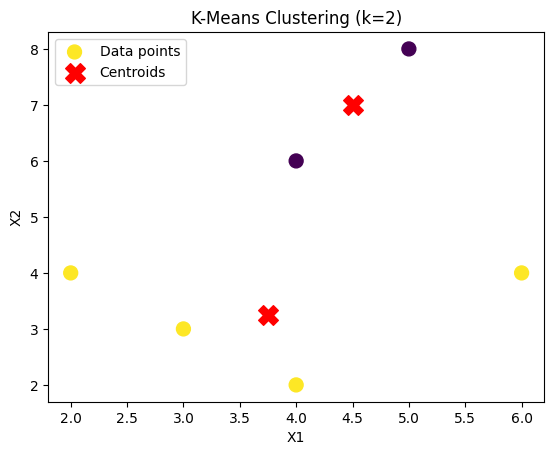

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=100, label="Data points")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label="Centroids")
plt.title("K-Means Clustering (k=2)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

### **K-Means 2**

**Import**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))

df = pd.read_csv(filename)

Saving Air_Traffic_Passenger_Statistics.csv to Air_Traffic_Passenger_Statistics (1).csv


**Data Preparation**

In [11]:
airline_data = df.groupby("Operating Airline")["Adjusted Passenger Count"].sum().reset_index()
X = airline_data[["Adjusted Passenger Count"]].values

**Model Fit and Evaluation**

In [12]:
wcss = []
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

**Plots**

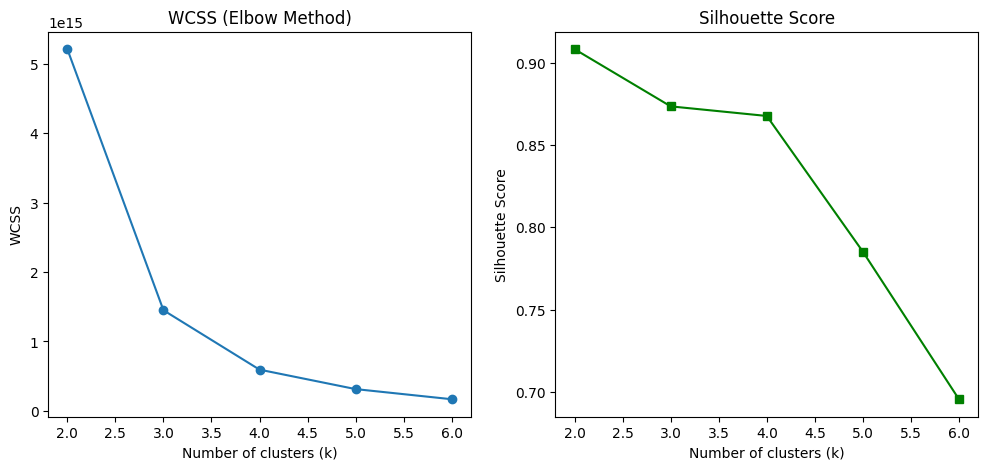

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2,7), wcss, marker='o')
plt.title("WCSS (Elbow Method)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.subplot(1,2,2)
plt.plot(range(2,7), silhouette_scores, marker='s', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

**Find best k by silhouette score**

In [14]:
best_k = range(2,7)[silhouette_scores.index(max(silhouette_scores))]
print("✅ Optimal number of clusters (k):", best_k)

✅ Optimal number of clusters (k): 2


**Final clustering with best k**

In [15]:
final_kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10)
airline_data["Cluster"] = final_kmeans.fit_predict(X)
print("\nAirline Cluster Assignments:\n")
print(airline_data.sort_values("Cluster"))


Airline Cluster Assignments:

                   Operating Airline  Adjusted Passenger Count  Cluster
0                       ATA Airlines                    425113        0
1                         Aer Lingus                    431904        0
2                         Aeromexico                    983488        0
3                         Air Berlin                     83547        0
4                        Air Canada                    6680071        0
..                               ...                       ...      ...
76                      Xtra Airways                       146        0
75                 XL Airways France                     69444        0
74                     World Airways                       785        0
69                   United Airlines                  64961880        1
70  United Airlines - Pre 07/01/2013                 106333323        1

[77 rows x 3 columns]
